In [1]:
import os
from pathlib import Path
import sys
import numpy as np
import scipy as sp
from typing import Tuple
import matplotlib.pyplot as plt
sys.path.append(Path(os.getcwd()).parent)
import In_Chapter_Algos

In [2]:
def generate_condition_number(ne:int)->Tuple[float,float,float]:
    h = 1/ne
    xx = np.arange(0,1+h,h)
    nvtx = len(xx)
    K = sp.sparse.lil_array((nvtx,nvtx))
    M = sp.sparse.lil_array((nvtx,nvtx))

    #Generate specific p, q, f in this case
    p = np.ones(ne)
    q = np.ones(ne)
    f = np.zeros(ne)
    Kks, Mks, _ = In_Chapter_Algos.get_elt_arrays(h = h,
                                                  p = p,
                                                  q = q,
                                                  f = f,
                                                  ne = ne)

    for count in range(ne):
        K[count:count+2,count:count+2] += Kks[count,:,:]
        M[count:count+2,count:count+2] += Mks[count,:,:]

    A = K+M

    return sparse_cond_number(K), sparse_cond_number(M), sparse_cond_number(A)

def sparse_cond_number(M:sp.sparse)->float:
    m,n = M.shape
    svds = sp.sparse.linalg.svds(M,
                                 k=max(m,n)-1,
                                 return_singular_vectors=False)
    return max(svds)/min(svds)

def generate_log_num(n):
    out = np.zeros(n,dtype=int)
    out[0] = 4
    for k in range(1,n):
        out[k] = 2*out[k-1]
    return out

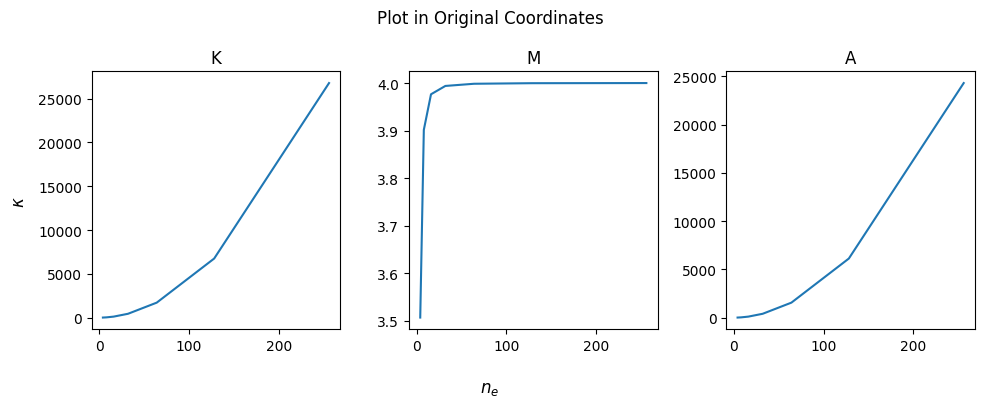

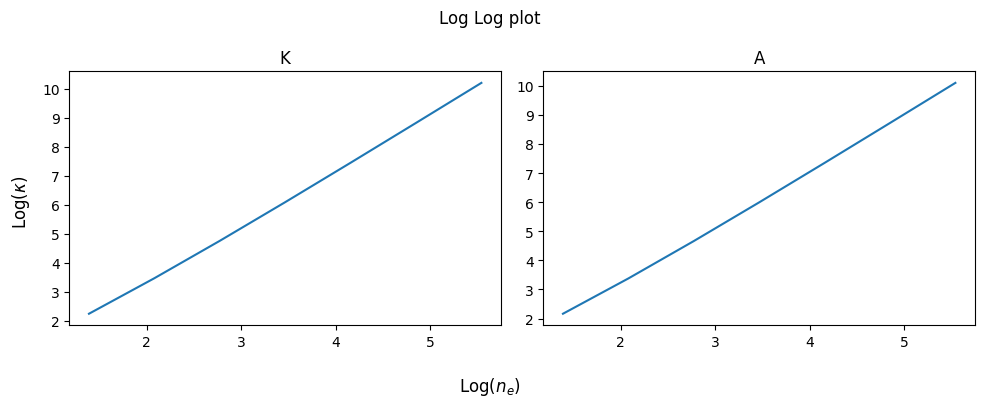

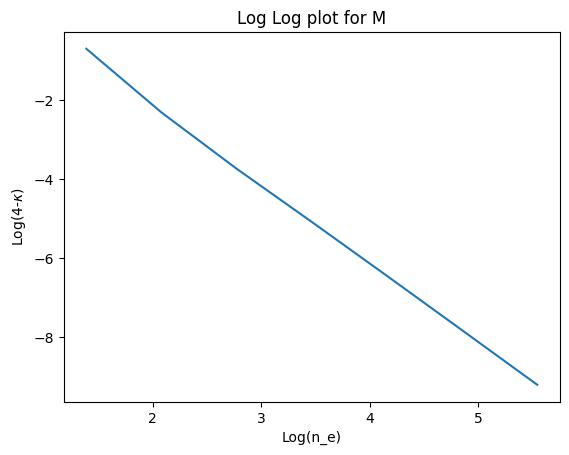

In [6]:
n = 7
ne_arr = generate_log_num(n=n)
cond_arr = np.zeros((3,n))
for count,ne in enumerate(ne_arr):
    K_cond,M_cond,A_cond = generate_condition_number(ne=ne)
    cond_arr[0,count] = K_cond
    cond_arr[1,count] = M_cond
    cond_arr[2,count] = A_cond

cond_arr_mod = cond_arr.copy()
cond_arr_mod[1,:]=4-cond_arr[1,:]
log_cond_arr = np.log(cond_arr_mod)
log_ne_arr = np.log(ne_arr)

fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(10,4))
axs[0].plot(ne_arr,cond_arr[0,:])
axs[0].set_title("K")
axs[1].plot(ne_arr,cond_arr[1,:])
axs[1].set_title("M")
axs[2].plot(ne_arr,cond_arr[2,:])
axs[2].set_title("A")
fig.supxlabel("$n_e$")
fig.supylabel("$\kappa$")
fig.suptitle("Plot in Original Coordinates")
plt.tight_layout()

fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
axs[0].plot(log_ne_arr,log_cond_arr[0,:])
axs[0].set_title("K")
axs[1].plot(log_ne_arr,log_cond_arr[2,:])
axs[1].set_title("A")
fig.supxlabel("Log($n_e$)")
fig.supylabel("Log($\kappa$)")
fig.suptitle("Log Log Plot for A and K")
plt.tight_layout()
plt.show()

plt.plot(log_ne_arr,log_cond_arr[1,:])
plt.title("Log Log plot for M")
plt.ylabel("Log(4-$\kappa$)")
plt.xlabel("Log(n_e)")
plt.show()